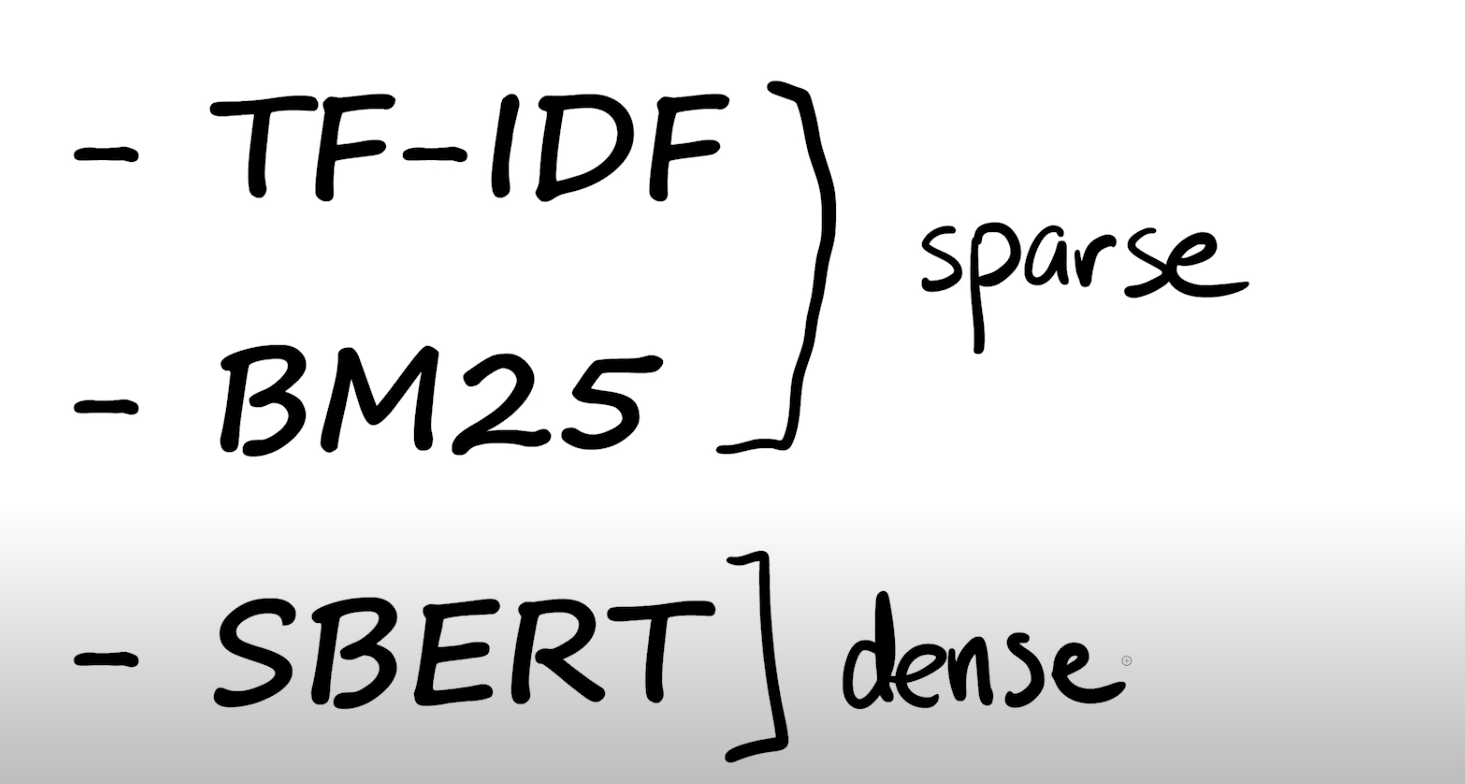

# TF-IDF

TF-IDF is one of the best known methods for text focused search. In this notebook we'll explore how it works, and implement it in Python. Let's start by creating a few example sentences.

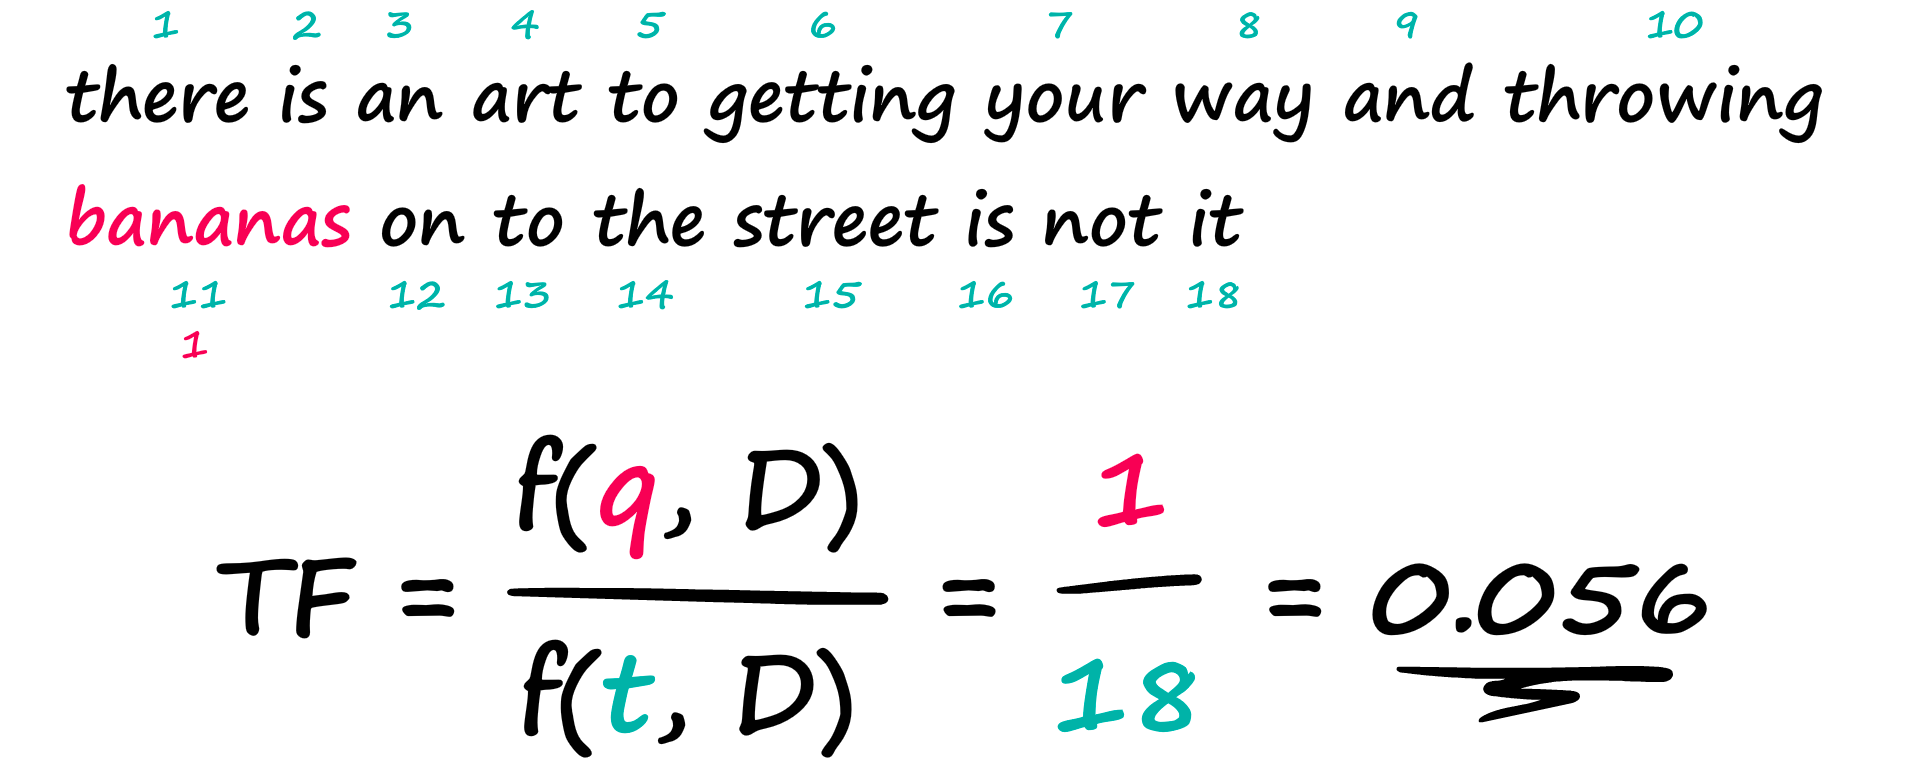

The Inverse Document Frequency measures **how common a word is across all of our documents.**

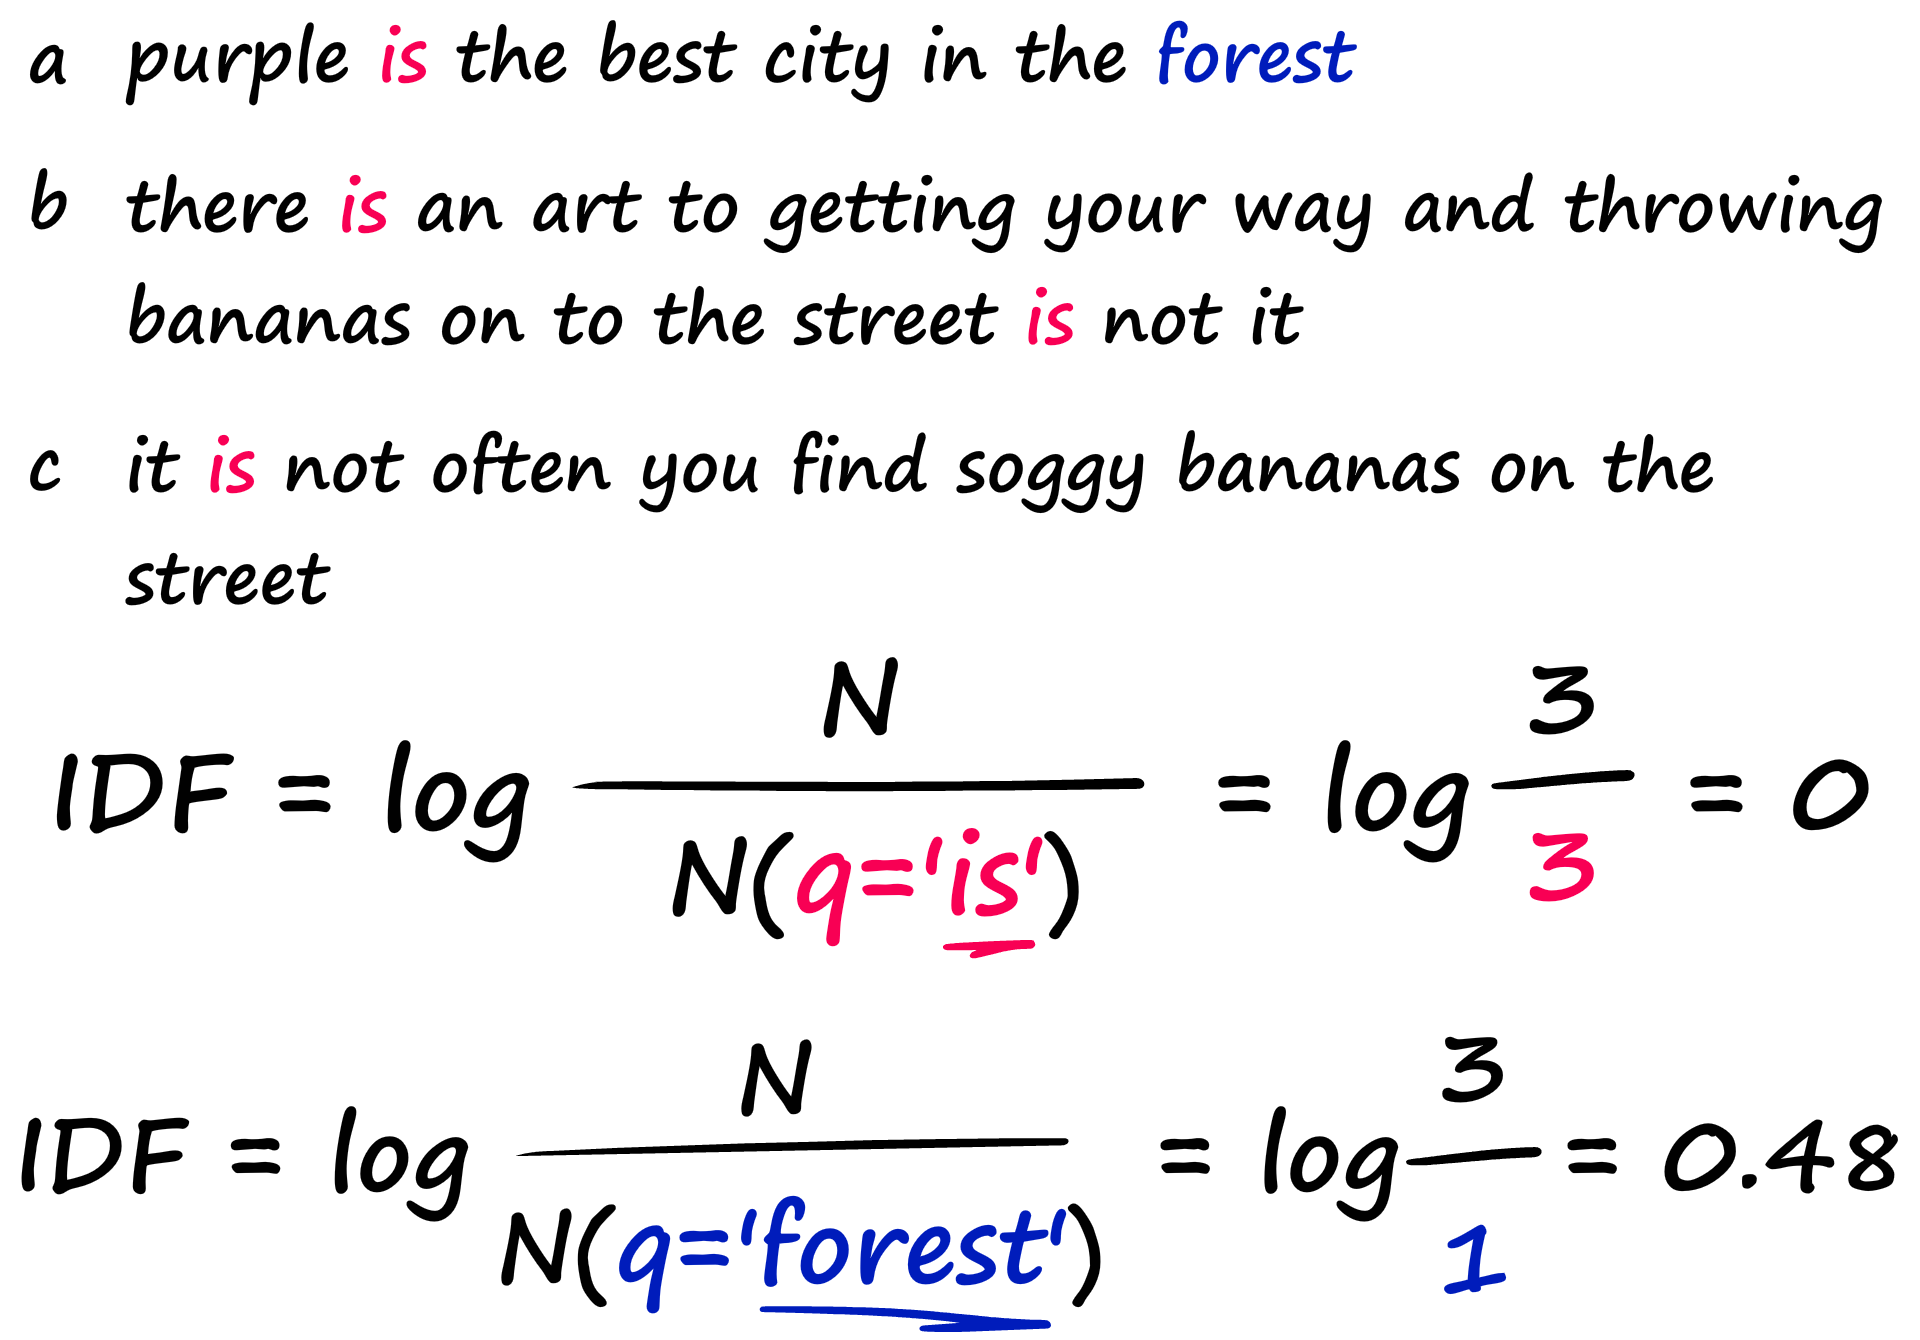

In [ ]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting your way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()

To calculate the TF-IDF for a given word (the query) and a sentence (the document), we calculate the **T**erm **F**requency (**TF**), and the **I**nverse **D**ocument **F**requency (**IDF**).

In [ ]:
import numpy as np

# we'll merge all docs into a list of lists for easier calculations below
docs = [a, b, c]

def tfidf(word, sentence):
    # term frequency
    tf = sentence.count(word) / len(sentence)
    # inverse document frequency
    idf = np.log10(len(docs) / sum([1 for doc in docs if word in doc]))
    return round(tf*idf, 4)

Let's calculate the score between each sentence *a*, *b*, and *c* - against the word *'forest'*.

In [ ]:
tfidf('forest', a)

0.0596

In [ ]:
tfidf('forest', b)

0.0

In [ ]:
tfidf('forest', c)

0.0

We would expect sentence *a* to score highest (as the only sentence that contains the word), and that is what we see above.

---

## Vectors

Now, calculating TF-IDF vectors is slightly different. It requires that we compute the TF-IDF score for all words within our document vocabulary (a set of all words across all documents), and we compute that for each sentence (document) - producing document-specific TF-IDF vectors.

Let's start by creating a vocabulary.

In [ ]:
vocab = set(a+b+c)

And now we create the vectors.

In [ ]:
# initialize vectors
vec_a = []
vec_b = []
vec_c = []

for word in vocab:
    vec_a.append(tfidf(word, a))
    vec_b.append(tfidf(word, b))
    vec_c.append(tfidf(word, c))

print(vec_a)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0596, 0.0, 0.0, 0.0, 0.0596, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0596, 0.0, 0.0, 0.0596, 0.0, 0.0596, 0.0]


In [ ]:
print(vec_b)

[0.0, 0.0, 0.0265, 0.0265, 0.0098, 0.0, 0.053, 0.0, 0.0265, 0.0265, 0.0, 0.0, 0.0, 0.0098, 0.0098, 0.0098, 0.0, 0.0098, 0.0, 0.0265, 0.0265, 0.0, 0.0265, 0.0, 0.0265]


In [ ]:
print(vec_c)

[0.0434, 0.0, 0.0, 0.0, 0.016, 0.0434, 0.0, 0.0, 0.0, 0.0, 0.0434, 0.0, 0.0434, 0.016, 0.016, 0.016, 0.0, 0.016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


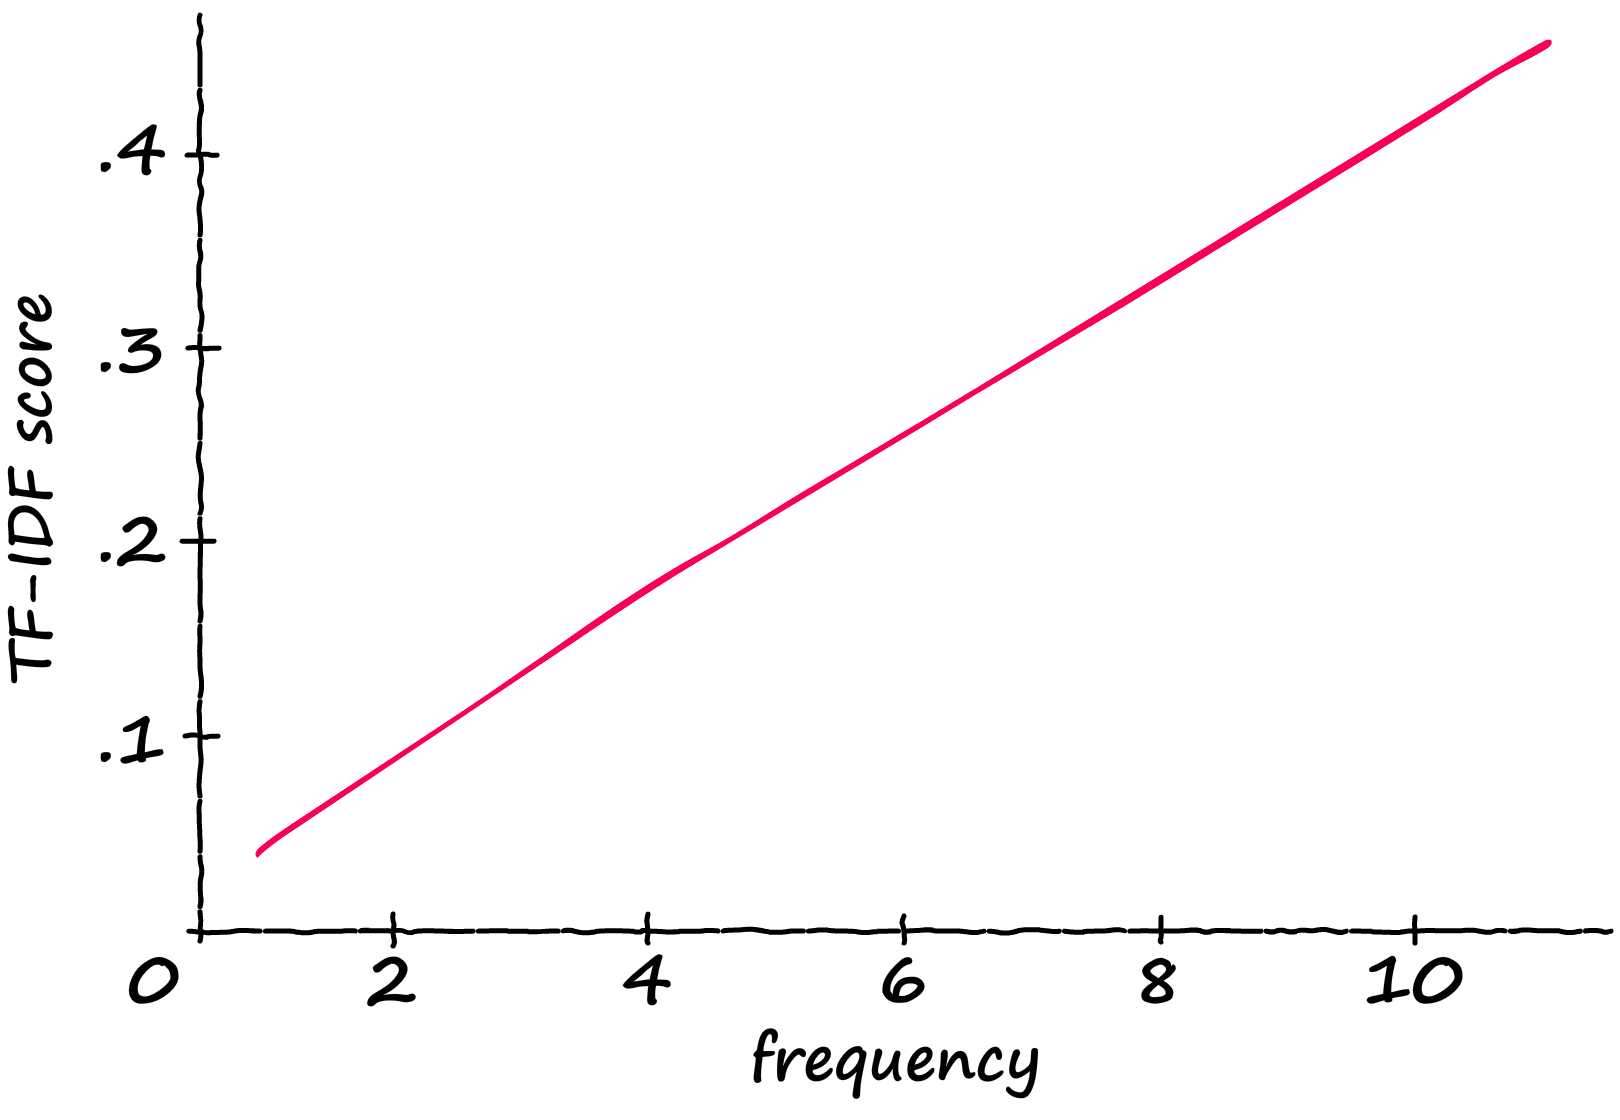